# Projet

## Mise en place de l'environnement

In [ ]:
!pip install numpy pandas matplotlib tensorflow scikit-learn mlflow

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pickle



## Exploration des données - CIFAR-100

### Chargement des données

Le jeu de données CIFAR-100 est chargé à l'aide de la bibliothèque `tensorflow.keras`.
Il contient :
- **Nombre total d'images** : 60 000.
  - **Entraînement** : 50 000 images.
  - **Test** : 10 000 images.
- **Caractéristiques des données** :
  - Chaque image a une taille de **32x32 pixels** avec **3 canaux de couleur** (RVB).
  - Les images appartiennent à **100 classes fines** (catégories détaillées) réparties de manière équilibrée.
- **Représentation des caractéristiques** :
  - Les images peuvent être utilisées sous forme de matrices 3D (32x32x3) ou transformées en vecteurs plats (3072 valeurs).



In [ ]:
# Chargement des données
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Aperçu des dimensions des données
print(f"Dimensions des images d'entraînement : {x_train.shape}")
print(f"Dimensions des labels d'entraînement : {y_train.shape}")
print(f"Dimensions des images de test : {x_test.shape}")
print(f"Dimensions des labels de test : {y_test.shape}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Dimensions des images d'entraînement : (50000, 32, 32, 3)
Dimensions des labels d'entraînement : (50000, 1)
Dimensions des images de test : (10000, 32, 32, 3)
Dimensions des labels de test : (10000, 1)


### Visualisation des données

Affichons quelques exemples d'images avec leurs labels pour comprendre leur structure visuelle et vérifier leur qualité.

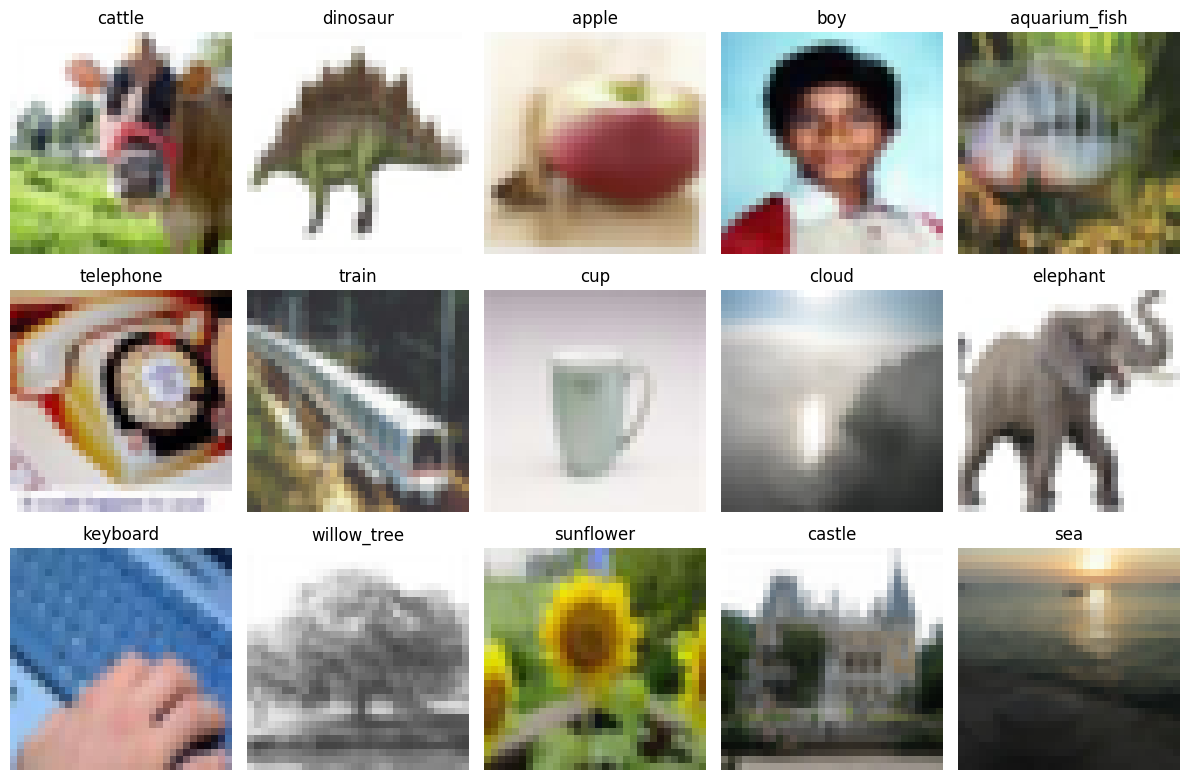

In [ ]:
# Liste des classes dans CIFAR-100 (labels "fine")
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Visualisation d'échantillons
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"{class_names[y_train[i][0]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

## Prétraitement des données - CIFAR-100


### Vérification des déséquilibres
Bien que CIFAR-100 soit équilibré par défaut, on peut visualiser la répartition des classes pour confirmation :

In [ ]:
# Vérification de l'équilibre des classes
train_counts = pd.Series(np.squeeze(y_train)).value_counts()
test_counts = pd.Series(np.squeeze(y_test)).value_counts()

# Chaque classe devrait avoir un nombre similaire d'instances
assert (train_counts.min() == train_counts.max()), "Les classes d'entraînement ne sont pas équilibrées."
assert (test_counts.min() == test_counts.max()), "Les classes de test ne sont pas équilibrées."

print("Les classes sont équilibrées dans les données d'entraînement et de test.")


Les classes sont équilibrées dans les données d'entraînement et de test.


### Normalisation des pixels

Les pixels des images sont initialement compris dans la plage **[0, 255]**. Nous les normalisons dans une plage **[0, 1]** pour faciliter la convergence des modèles et uniformiser les données.

In [ ]:
# Normalisation des pixels
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Valeurs après normalisation : Min = {x_train.min()}, Max = {x_train.max()}")


Valeurs après normalisation : Min = 0.0, Max = 1.0


### Nouvelle section

In [ ]:
# Aplatir les images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

## RandomForestClassifier

## MLP

## CNN

### Recherche d'hyperparamètres et validation croisée pour le CNN


1. **Augmentation des données :**
   - Les images du dataset sont augmentées à l'aide de transformations comme la rotation, le décalage, le cisaillement et la symétrie horizontale pour augmenter la diversité des données d'entraînement.

2. **Construction d'un modèle CNN paramétrable :**
   - Une fonction générique (`create_cnn_model`) permet de construire dynamiquement un CNN avec différents hyperparamètres, tels que le nombre de filtres dans les couches convolutionnelles, les taux de dropout, et le nombre de neurones dans les couches entièrement connectées.
     

3. **Recherche d'hyperparamètres :**
   - Utilisation de **Keras Tuner** pour effectuer une recherche en grille **(*grid search*)** des meilleurs hyperparamètres.

4. **Validation croisée K-Fold :**
   - Le dataset est divisé en 3 sous-ensembles (folds), et la validation croisée est utilisée pour évaluer la robustesse du modèle.

5. **Suivi et journalisation des expérimentations avec MLflow :**
   - Les hyperparamètres, les métriques (précision et perte), ainsi que les modèles entraînés sont enregistrés dans un serveur **MLflow**, permettant de suivre et comparer les résultats des différents folds.

6. **Analyse des résultats :**
   - Les précisions des 3 folds sont agrégées pour calculer une précision moyenne et son écart-type, fournissant une évaluation globale de la performance du modèle.

In [ ]:
import mlflow
import mlflow.keras
from sklearn.model_selection import KFold
import keras_tuner as kt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialisation de MLflow
mlflow.set_tracking_uri("http://34.201.243.188:5000")
mlflow.set_experiment("CIFAR100_CNN_GridSearch")

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    shear_range=0.05
)

datagen.fit(x_train)

def create_cnn_model(hp):
    model = Sequential()

    # Première couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_1', values=[32, 128]),
        (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]
    ))
    # Normalisation des lots
    model.add(BatchNormalization())

    # Deuxième couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_2', values=[32, 128]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())
    # Première couche de pooling
    model.add(MaxPooling2D((2, 2)))
    # Première couche de dropout
    model.add(Dropout(hp.Choice('dropout_1', values=[0.2, 0.3])))

    # Troisième couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_3', values=[64, 192]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())

    # Quatrième couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_4', values=[64, 192]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())
    # Deuxième couche de pooling
    model.add(MaxPooling2D((2, 2)))
    # Deuxième couche de dropout
    model.add(Dropout(hp.Choice('dropout_2', values=[0.2, 0.3])))

    # Cinquième couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_5', values=[128, 256]),
        (3, 3), activation='relu', padding='same'
    ))

    # Normalisation des lots
    model.add(BatchNormalization())

    # Sixième couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_6', values=[256, 384]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())

    # Troisième couche de pooling
    model.add(MaxPooling2D((2, 2)))
    # Troisième couche de dropout
    model.add(Dropout(hp.Choice('dropout_3', values=[0.2, 0.3])))

    # Applatissement des caractéristiques pour les couches entièrement connectées
    model.add(Flatten())

    # Couche entièrement connectée
    model.add(Dense(
        hp.Choice('dense_units', values=[512, 1024]), activation='relu'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())
    # Quatrième couche de dropout
    model.add(Dropout(hp.Choice('dropout_4', values=[0.3, 0.4])))

    # Couche de sortie avec 100 classes (pour CIFAR-100)
    model.add(Dense(100, activation='softmax'))

    # Compilation du modèle avec l'optimiseur Adam
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.0009472383604157623, 1e-4], default=0.0009472383604157623)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Validation croisée K-Fold avec 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)
# Liste pour enregistrer les précisions de validation pour chaque fold
fold_accuracies = []

# Callback EarlyStopping pour arrêter l'entraînement si la précision ne s'améliore pas
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"Fold {fold + 1}/3")

    # Division des données en sous-ensembles pour l'entraînement et la validation
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialisation Keras Tuner pour la recherche d'hyperparamètres
    tuner = kt.GridSearch(
        create_cnn_model,
        objective='val_accuracy',  # Objectif : maximiser la précision sur l'ensemble de validation
        directory=f'/kaggle/output/keras_tuner_dir_fold_{fold + 1}',
        project_name='cifar100_CNN_gridsearch'
    )

    # Recherche les meilleurs hyperparamètres pour ce fold
    tuner.search(
        x_train_fold,
        y_train_fold,
        epochs=10,
        validation_data=(x_val_fold, y_val_fold),
        batch_size=64,
        callbacks=[early_stop]
    )

     # Récupére les meilleurs hyperparamètres trouvés
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"Meilleurs hyperparamètres pour le Fold {fold + 1} : {best_hps.values}")

    best_model = tuner.hypermodel.build(best_hps)

    # Enregistrement avec MLflow
    with mlflow.start_run(run_name=f"Fold_{fold + 1}"):
        mlflow.log_params(best_hps.values)  # Enregistrer les hyperparamètres

        history = best_model.fit(
            x_train_fold,
            y_train_fold,
            epochs=10,
            batch_size=64,
            validation_data=(x_val_fold, y_val_fold),
            callbacks=[early_stop]
        )

        for epoch, acc in enumerate(history.history['val_accuracy']):
            mlflow.log_metric("val_accuracy", acc, step=epoch)

        for epoch, loss in enumerate(history.history['val_loss']):
            mlflow.log_metric("val_loss", loss, step=epoch)

        mlflow.keras.log_model(best_model, "model")

    fold_accuracy = max(history.history['val_accuracy'])
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy pour le Fold {fold + 1} : {fold_accuracy}")

# Résumé des performances des folds
with mlflow.start_run(run_name="Final_Summary"):
    mlflow.log_metric("mean_accuracy", np.mean(fold_accuracies))
    mlflow.log_metric("std_accuracy", np.std(fold_accuracies))

print(f"Accuracies des 3 folds : {fold_accuracies}")
print(f"Accuracy moyenne : {np.mean(fold_accuracies)}")
print(f"Écart-type des accuracies : {np.std(fold_accuracies)}")


Trial 20 Complete [00h 00m 56s]
val_accuracy: 0.2799712121486664

Best val_accuracy So Far: 0.46213847398757935
Total elapsed time: 00h 18m 12s
Meilleurs hyperparamètres pour le Fold 3 : {'filters_1': 32, 'filters_2': 32, 'dropout_1': 0.2, 'filters_3': 64, 'filters_4': 64, 'dropout_2': 0.2, 'filters_5': 128, 'filters_6': 384, 'dropout_3': 0.2, 'dense_units': 512, 'dropout_4': 0.3, 'learning_rate': 0.0009472383604157623}
Epoch 1/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.1082 - loss: 4.1238 - val_accuracy: 0.1964 - val_loss: 3.4414
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2951 - loss: 2.8028 - val_accuracy: 0.3079 - val_loss: 2.9753
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4026 - loss: 2.2653 - val_accuracy: 0.3708 - val_loss: 2.5793
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4629 - loss: 1.9897 - val_accuracy: 0.4344 - val_loss: 2.1914
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accu

2024/12/09 20:38:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/09 20:38:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp5gzo7x23/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 
2024/12/09 20:38:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Fold_3 at: http://34.201.243.188:5000/#/experiments/2/runs/9b524c7531eb43cdb713a9cb26882ffd
🧪 View experiment at: http://34.201.243.188:5000/#/experiments/2
Accuracy pour le Fold 3 : 0.4343573749065399
🏃 View run Final_Summary at: http://34.201.243.188:5000/#/experiments/2/runs/930545cb320a46a0bb4c7aa7accf7f82
🧪 View experiment at: http://34.201.243.188:5000/#/experiments/2
Accuracies des 3 folds : [0.5009899735450745, 0.45407092571258545, 0.4343573749065399]
Accuracy moyenne : 0.46313942472139996
Écart-type des accuracies : 0.027948214684014684


### Récupération des meilleurs hyperparamètres
L les meilleurs hyperparamètres identifiés par **Keras Tuner** après la recherche. Les hyperparamètres optimaux sont récupérés avec `get_best_hyperparameters` et affichés pour analyse. Ces valeurs peuvent être utilisées pour construire le modèle final.


In [ ]:
# Récupére les meilleurs hyperparamètres du tuner après la validation croisée
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Affiche les meilleurs hyperparamètres
print("Meilleurs hyperparamètres sélectionnés :")
print(best_hps.values)

Meilleurs hyperparamètres sélectionnés :
{'filters_1': 32, 'filters_2': 32, 'dropout_1': 0.2, 'filters_3': 64, 'filters_4': 64, 'dropout_2': 0.2, 'filters_5': 128, 'filters_6': 384, 'dropout_3': 0.2, 'dense_units': 512, 'dropout_4': 0.4, 'learning_rate': 0.0009472383604157623}


### Construction du modèle final
Utilations des meilleurs hyperparamètres pour reconstruire le modèle CNN avec la fonction `create_cnn_model` et affiche son résumé pour validatio

In [ ]:
# Construit le modèle avec les meilleurs hyperparamètres
final_model = create_cnn_model(best_hps)

# Résumé du modèle reconstruit
final_model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 384)      │       442,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6144)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,146,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,784,580 (14.44 MB)

 Trainable params: 3,782,148 (14.43 MB)

 Non-trainable params: 2,432 (9.50 KB)

### Callbacks pour l'entraînement

- **ReduceLROnPlateau** : Réduit le taux d'apprentissage de moitié si la perte de validation stagne pendant 3 epochs.
- **EarlyStopping** : Arrête l'entraînement après 5 epochs sans amélioration de la précision de validation, en restaurant les meilleurs poids.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

# Callback pour réduire le taux d'apprentissage si la perte de validation ne diminue pas
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Callback pour arrêter l'entraînement si la précision de validation ne s'améliore pas
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

### Division des données

Les données d'entraînement sont divisées en un ensemble d'entraînement et un ensemble de validation **(10% des données)**, tout en conservant la stratification des classes.

In [ ]:
x_train1, x_val, y_train1, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print(f"Dimensions de l'entraînement : {x_train1.shape}")
print(f"Dimensions de la validation : {x_val.shape}")


Dimensions de l'entraînement : (45000, 32, 32, 3)
Dimensions de la validation : (5000, 32, 32, 3)


### Entraînement et suivi avec MLflow

- **Journalisation des hyperparamètres** : Les paramètres clés de l'entraînement (batch size, epochs, optimizer, etc.) et les meilleurs hyperparamètres sont enregistrés avec **MLflow**.
- **Entraînement du modèle** : Le modèle final est entraîné sur les données augmentées avec suivi des métriques (précision et perte) pour l'entraînement et la validation.
- **Enregistrement des résultats** :
  - Les métriques par epoch sont journalisées dans MLflow.
  - Les courbes d'apprentissage (précision et perte) sont sauvegardées et ajoutées aux artefacts de l'expérience.
- **Sauvegarde du modèle final** : Le modèle entraîné est enregistré dans MLflow pour une utilisation future.


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 - 43s - 61ms/step - accuracy: 0.1557 - loss: 3.7188 - val_accuracy: 0.2074 - val_loss: 3.4131 - learning_rate: 9.4724e-04
Epoch 2/50
704/704 - 26s - 36ms/step - accuracy: 0.2856 - loss: 2.8702 - val_accuracy: 0.3176 - val_loss: 2.7749 - learning_rate: 9.4724e-04
Epoch 3/50
704/704 - 25s - 36ms/step - accuracy: 0.3505 - loss: 2.5287 - val_accuracy: 0.3766 - val_loss: 2.4500 - learning_rate: 9.4724e-04
Epoch 4/50
704/704 - 25s - 36ms/step - accuracy: 0.4054 - loss: 2.2658 - val_accuracy: 0.3856 - val_loss: 2.6340 - learning_rate: 9.4724e-04
Epoch 5/50
704/704 - 25s - 35ms/step - accuracy: 0.4423 - loss: 2.1062 - val_accuracy: 0.3742 - val_loss: 2.4723 - learning_rate: 9.4724e-04
Epoch 6/50
704/704 - 25s - 36ms/step - accuracy: 0.4724 - loss: 1.9564 - val_accuracy: 0.4648 - val_loss: 2.0598 - learning_rate: 9.4724e-04
Epoch 7/50
704/704 - 25s - 35ms/step - accuracy: 0.5001 - loss: 1.8426 - val_accuracy: 0.5124 - val_loss: 1.8631 - learning_rate: 9.4724e-04
Epoch 8/50
704/704 - 25s

2024/12/09 21:59:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/09 21:59:12 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp87x7hopz/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 
2024/12/09 21:59:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run model_training at: http://34.201.243.188:5000/#/experiments/2/runs/c6832ebc4fb9451b9315305a1d695bf7
🧪 View experiment at: http://34.201.243.188:5000/#/experiments/2


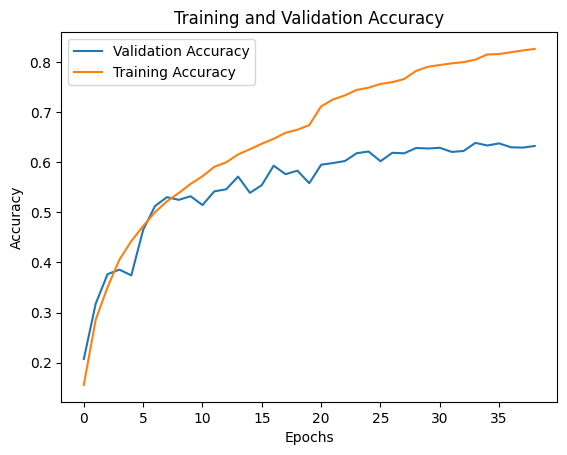

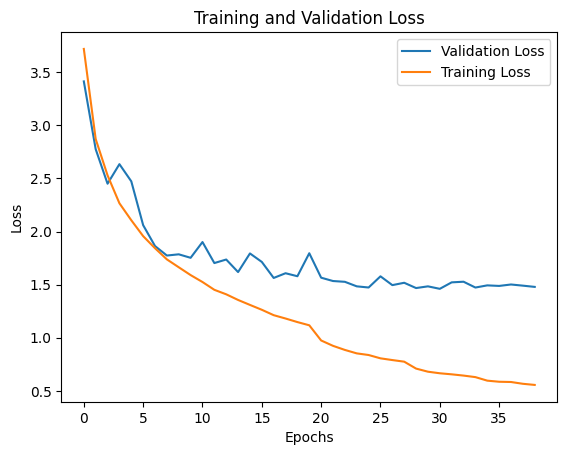

In [ ]:
with mlflow.start_run(run_name="model_training"):
    mlflow.log_params({
        "batch_size": 64,
        "epochs": 50,
        "optimizer": "Adam",
        "reduce_lr_factor": 0.5,
        "reduce_lr_patience": 5,
        "early_stopping_patience": 5
    })
    mlflow.log_params(best_hps.values)

    # Entraîne le modèle
    history = final_model.fit(
        datagen.flow(x_train1, y_train1, batch_size=64),
        epochs=50,
        batch_size=64,
        validation_data=(x_val, y_val),
        callbacks=[lr_reduction, early_stop],
        verbose=2
    )

    # Enregistre les métriques
    for epoch, acc in enumerate(history.history['accuracy']):
        mlflow.log_metric("train_accuracy", acc, step=epoch)

    for epoch, val_acc in enumerate(history.history['val_accuracy']):
        mlflow.log_metric("val_accuracy", val_acc, step=epoch)

    for epoch, loss in enumerate(history.history['loss']):
        mlflow.log_metric("train_loss", loss, step=epoch)

    for epoch, val_loss in enumerate(history.history['val_loss']):
        mlflow.log_metric("val_loss", val_loss, step=epoch)

    # Enregistre le modèle
    mlflow.keras.log_model(final_model, artifact_path="final_model")

    # Enregistre les courbes d'apprentissage
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and Validation Accuracy")
    plt.savefig("accuracy_curve.png")
    mlflow.log_artifact("accuracy_curve.png")

    plt.figure()
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss")
    plt.savefig("loss_curve.png")
    mlflow.log_artifact("loss_curve.png")

### Évaluation sur les données de test

Le modèle final est évalué sur l'ensemble de test pour mesurer la perte et la précision.

### Résultats sur les données de test

- **Test Loss** : 1.4953  
- **Test Accuracy** : 63.66%


In [ ]:
# Évaluation du modèle sur les données de test
loss, accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.4953
Test Accuracy: 0.6366


## CNN sans transfert

## Comparaison